# Aim 
Figure out eigenspectrum of simple beamsplitter hamiltonians and then eventually that of the Circle grape mode

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import *

# Simple Model

In [3]:
def chi(): 
    return g**2 / (delta * (delta + A)) * A

In [24]:
chi1 = 200 * 1e-3 # in units of MHZ
chi2 = 240 * 1e-3

alpha1 = 10 
alpha2 = 10

del_c1 = 10   # Cavity drive detunings 
del_c2 = 10 

g12 = np.sqrt(chi1 * chi2) / 4 # cross kerr

N = 5 # number of photons in the cavity

In [25]:
#operators 
a = np.diag(np.sqrt(np.arange(1, N)), 1)
adag = np.diag(np.sqrt(np.arange(1, N)), -1)
n = adag @ a
b = np.diag(np.sqrt(np.arange(1, N)), 1)
bdag = np.diag(np.sqrt(np.arange(1, N)), -1)
m = bdag @ b

In [26]:
g12

0.05477225575051661

In [27]:
chi1 * alpha1

2.0

In [155]:
def generate_combined_states(n_a, n_b):
    '''Generates |n_a, n_b> state'''
    states = []
    for i in range(N):
        state_A = np.zeros(N)
        state_A[i] = 1
        for j in range(N):
            state_B = np.zeros(N)
            state_B[j] = 1
            state = np.kron(state_A, state_B)
            states.append(state)
    return states[n_a * N + n_b]




class Hamiltonian: 
    def __init__(self, H): 
        self.H =  H
        self.energies, self.evs = np.linalg.eigh(self.H)
        psis = self.evs.T
        self.N = N

    # def Hamiltonian(self): 
    #     '''
    #     Cooper pair box Hammy
    #     '''
    #     #n = np.arange(-N, N+1 )
    #     H = 4 * self.Ec * np.diag((self.n - self.ng) ** 2) - self.EJ/2 * (np.diag(np.ones(2*self.N) , 1) + np.diag(np.ones(2*self.N), -1))
    #     return H
    
    def plot_energies(self): 
        plt.plot(self.energies, 'o')
        plt.xlabel('Eigenstate index')
        plt.ylabel('Energy (Mhz)')
        #plt.title('')
    
    def remove_0_entries(self, wf, labels):
        '''removes 0 entries from wavefunction and labels''' 
        # remove zero entries
        new_psi = []
        xlabels_new = []
        for i in range(len(wf)):
            if np.abs(wf[i]) > 0:
                new_psi.append(wf[i])
                xlabels_new.append(labels[i])
        return new_psi, xlabels_new


    
    def plot_wavefunctions(self, n_wfs = 2, start_idx = 0, n_cutoff = 2): 
        '''Plots wavefunctions
        n_wfs: number of wavefunctions to plot
        start_idx: starting index of wavefunctions to plot
        n_cutoff: number of photons to cut off  (states with more than n_cutoff photons are not plotted)
        '''
        plt.figure(figsize = (12, 4))
        psis = self.evs.T
        state_labels = [f'|{i}, {j}>' for i in range(N) for j in range(N)]
        #return psis
        wfs_to_plot = []
        xlabels_to_plot = []
        wfs_idxs = []
        for i in range( n_wfs): 
            # label wavefunctions by energy 
            wf_idx = start_idx + i
            wf_label = 'E = %.2f MHz' %self.energies[wf_idx] # this is for title 
            wf, labels = self.remove_0_entries(psis[wf_idx], state_labels) # this if for x axis labels
            
            # state contains more than n_cutoff photons, remove it
            plot_bool = True
            forbidden_numbers = np.arange(n_cutoff+1, N)
            # print('labels:', labels)
            for n in forbidden_numbers:
                for i in range(len(labels)):
                    if str(n) in labels[i]:
                        plot_bool = False
                        break
            if plot_bool: 
                wfs_to_plot.append(wf)
                xlabels_to_plot.append(labels)
                wfs_idxs.append(wf_idx)

        for i, wf in enumerate(wfs_to_plot):
            wf_idx = wfs_idxs[i]
            wf_label = 'E = %.2f MHz' %self.energies[wf_idx] 
            plt.subplot(1, len(wfs_to_plot), i+1, title= wf_label, xlabel = 'Bare Basis')#, ylabel = 'Wavefunction ')
            size_psi = len(wf)
            plt.bar(np.arange(size_psi), wf)

            # change xlabels to be in terms of n_a, n_b
            labels = xlabels_to_plot[i]
            plt.xticks(np.arange(size_psi), labels)
            # make tick labels vertical
            plt.xticks(rotation=90)
            # scale the y axis to be between -1 and 1
            plt.ylim(-1, 1)
        return plt.figure()

## Static Beamsplitter
$H = g(a^\dagger b + a b^\dagger$)

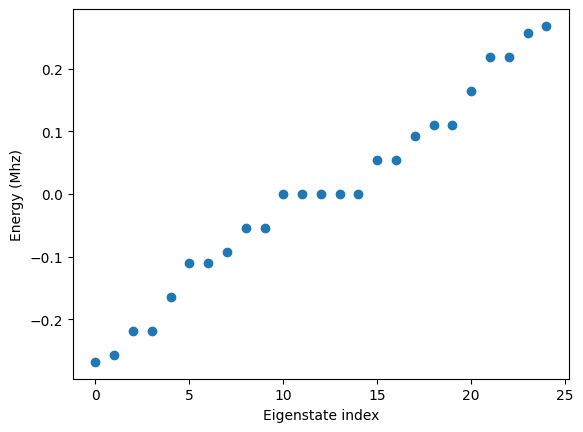

In [156]:
H = g12*(np.kron(a, bdag) + np.kron(adag, b)) 
H = Hamiltonian(H)
H.plot_energies()

<Figure size 640x480 with 0 Axes>

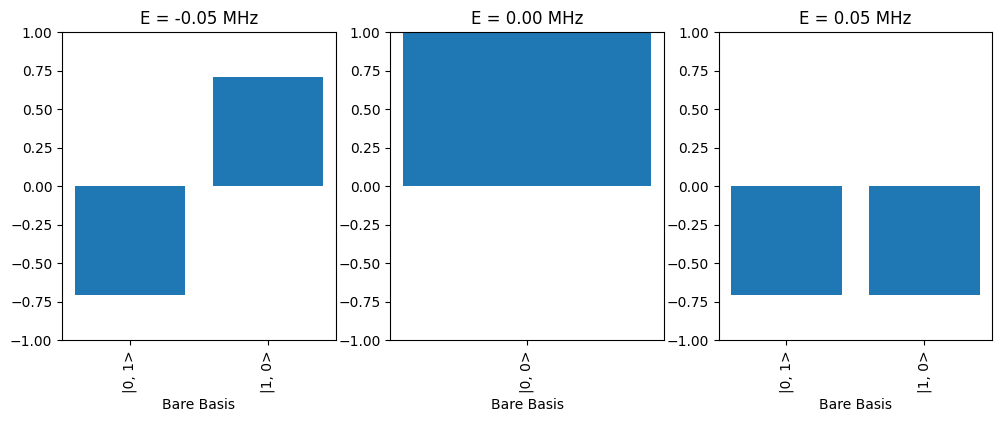

<Figure size 640x480 with 0 Axes>

In [158]:
H.plot_wavefunctions(start_idx=0, n_wfs=20, n_cutoff=1)

In [140]:
if str(4) in '04': 
    print('yes')

yes


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.5       ,
        0.        ,  0.        ,  0.        , -0.70710678,  0.        ,
        0.        ,  0.        ,  0.5       ,  0.        ,  0.        ])

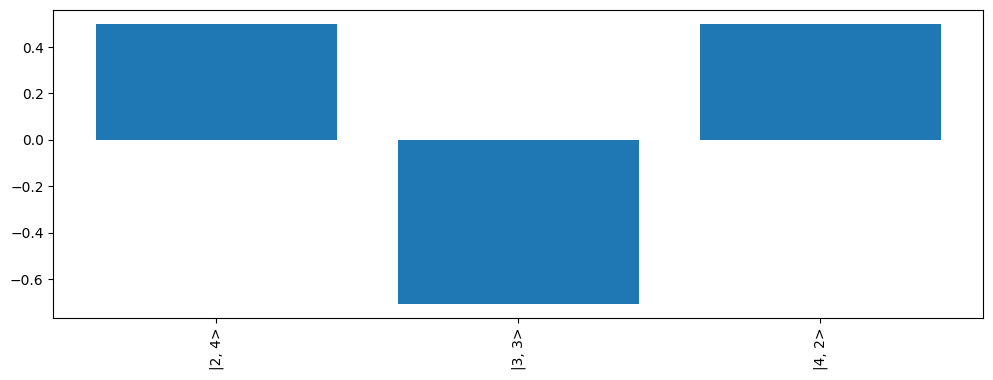

In [92]:
#plot using bar chart
plt.figure(figsize = (12, 4))
size_psi = psis[0].shape[0]
#

xlabels = [f'|{i}, {j}>' for i in range(N) for j in range(N)]
# remove zero entries
new_psi = []
xlabels_new = []
for i in range(size_psi):
    if np.abs(psis[0][i]) > 0:
        new_psi.append(psis[0][i])
        xlabels_new.append(xlabels[i])
size_new_psi = len(new_psi)
plt.bar(np.arange(0, size_new_psi), new_psi)


# change xlabels to be in terms of n_a, n_b
plt.xticks(np.arange(0, size_new_psi), xlabels_new)
# make tick labels vertical
plt.xticks(rotation=90)
psis[0]

In [89]:
new_psi

[0.49999999999999994, -0.7071067811865475, 0.4999999999999999]

In [85]:
np.arange(1, size_new_psi)

array([1, 2])

In [54]:
generate_combined_states(0, 0)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

## Hamiltonian

$$ H = \sum_{i = 1,2} \Delta_{c, i} a_i ^\dagger a  + \Omega_q \sigma_z/2 + \chi_i \alpha_i(a_i^\dagger \sigma^- + h.c.)/2 + g_{12} (a_1^\dagger a_2 + h.c.)$$

In [ ]:
def Ham(Omega_q):
    '''
    Hamiltonian
    '''
    H = np.array([[del_c1 , chi1 * alpha1 /2, g12], 
            [chi1 * alpha1 /2, Omega_q /2, chi2 * alpha2 /2], 
            [g12, chi2 * alpha2 /2, del_c2]])
    return H 


In [ ]:
def eig(H): 
    '''
    Diagonalize Hamiltonian and return eigenvalues
    '''
    w= linalg.eigvals(H)
    return w

In [ ]:
Omegaqs = np.linspace(0.01, 4, 1000) * del_c1
eigvals = []

for om in Omegaqs: 
    H = Ham(om)
    w = eig(H)
    eigvals.append(w)
    
eigvals = np.array(eigvals)
eigvalsT = eigvals.T

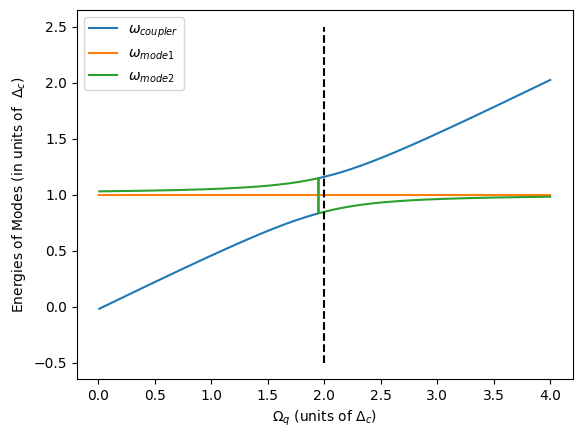

In [ ]:
# plot data 

labels = ['$\omega_{coupler}$', '$\omega_{mode 1}$', '$\omega_{mode 2}$']

for idx in range(len(eigvalsT)): 
    plt.plot(Omegaqs / (del_c1), eigvalsT[idx] /(del_c2), linestyle = '-', marker = '', label = labels[idx])

plt.vlines([2.00], ymin = -0.5, ymax = 2.5, color = 'k', linestyle = '--')
plt.xlabel('$\Omega_q $ (units of $ \Delta_c$)')
plt.ylabel('Energies of Modes (in units of  $\Delta_c$)')
plt.legend()
plt.show()

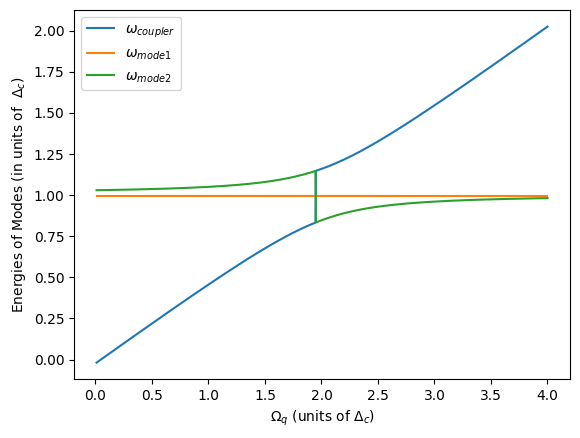

In [ ]:
labels = ['$\omega_{coupler}$', '$\omega_{mode 1}$', '$\omega_{mode 2}$']

for idx in range(len(eigvalsT)): 
    plt.plot(Omegaqs / (del_c1), eigvalsT[idx] /(del_c2), linestyle = '-', marker = '', label = labels[idx])

plt.xlabel('$\Omega_q $ (units of $ \Delta_c$)')
plt.ylabel('Energies of Modes (in units of  $\Delta_c$)')
plt.legend()
plt.show()

## Interpretation

1. There is an avoided crossing when the coupler transmon frequency becomes equal to that of the modes. At the crossing, the separation is proptional to $2g = \chi\alpha$

## Beamsplitter rate from Schrieffer Wolff Transformation

$$g_{SW} =  \frac{g_1  g_2}{2}  (\frac{1}{\delta_1} + \frac{1}{\delta_2} - \frac{1}{\Sigma_1}  - \frac{1}{\Sigma_2})$$
where
$$g_1 = \chi_1 \alpha_1/4 $$
$$\delta_1 = \Delta_{c,1} - \Omega_q$$
$$\Sigma_1 = \Delta_{c,1} + \Omega_q$$

In [ ]:
def g_sw(Omega_q): 
    '''
    Rate from Schrieffer wolff transformation
    '''
    g1 = chi1 * alpha1 / 4
    g2 = chi2 * alpha2  / 4
    
    del1 = del_c1 - Omega_q
    sum1 = del_c1 + Omega_q
    
    del2 = del_c2 - Omega_q
    sum2 = del_c2 + Omega_q
    
    return  g1 * g2 * (1/del1 + 1/del2 - 1/sum1 - 1/sum2)

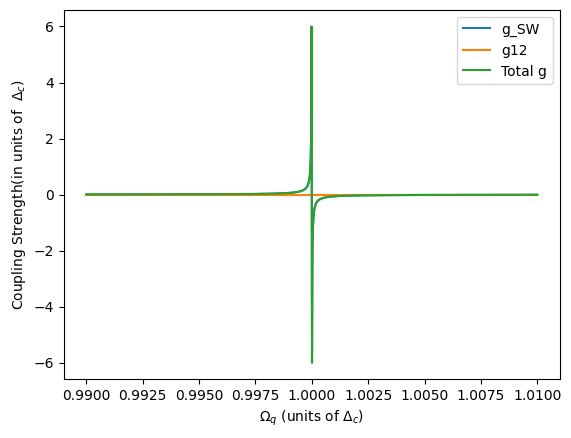

In [ ]:
Omegaqs = np.linspace(0.99, 1.01, 1000) * del_c1
gs_sw = g_sw(Omegaqs)

g12s = [g12 for i in range(len(Omegaqs))]

plt.plot(Omegaqs/del_c1, gs_sw, label = 'g_SW')
plt.plot(Omegaqs/del_c1, g12s, label = 'g12')
plt.plot(Omegaqs/del_c1, (gs_sw + g12s), label = 'Total g')

plt.xlabel('$\Omega_q $ (units of $ \Delta_c$)')
plt.ylabel('Coupling Strength(in units of  $\Delta_c$)')
#plt.yscale('log')
#plt.axis([ 1.00,  1.01, -1, 1])
plt.legend()
plt.show()

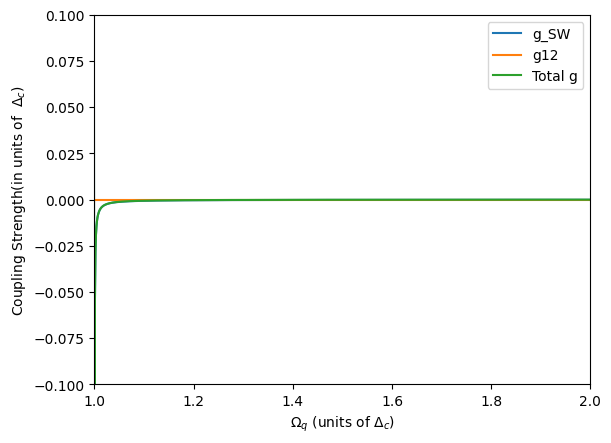

In [ ]:
Omegaqs = np.linspace(0.99, 2, 1000) * del_c1
gs_sw = g_sw(Omegaqs)

g12s = [g12 for i in range(len(Omegaqs))]

plt.plot(Omegaqs/del_c1, gs_sw, label = 'g_SW')
plt.plot(Omegaqs/del_c1, g12s, label = 'g12')
plt.plot(Omegaqs/del_c1, (gs_sw + g12s), label = 'Total g')

plt.xlabel('$\Omega_q $ (units of $ \Delta_c$)')
plt.ylabel('Coupling Strength(in units of  $\Delta_c$)')
#plt.yscale('log')
plt.axis([ 1.00,  2, -.1, .1])
plt.legend()
plt.show()